In [1]:
import sklearn as sk
import numpy as np
import scipy
import pandas
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

In [59]:
df1 = pd.read_csv("dataset1.csv", delimiter=',')
df2= pd.read_csv("dataset2.csv", delimiter=',')
print(df1.shape)
print(df2.shape)
print(df1.values)
print(df1.columns)
print(df2.columns)

(3499, 2)
(14800, 3)
[[ 1.29252552  1.6001803 ]
 [ 0.86981497  1.37049416]
 [ 2.09726383  1.71077141]
 ...
 [-5.40637045  2.11917622]
 [-5.36249572  2.16551228]
 [-7.02772125  2.58823058]]
Index(['8.228429240780527065e-01', ' 1.135491058107753304e+00'], dtype='object')
Index(['-6.126607425458740153e+00', ' 1.764511299313616988e+01',
       ' 6.095543727848264481e+00'],
      dtype='object')


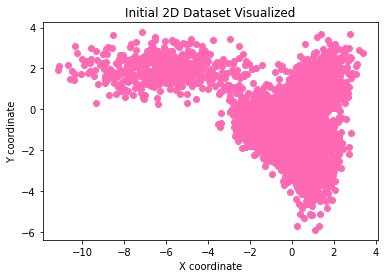

In [78]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
ax.set_title("Initial 2D Dataset Visualized")
plt.scatter(df1['8.228429240780527065e-01'].tolist(), df1[' 1.135491058107753304e+00'].tolist(), color = 'hotpink')
plt.show()

## K-Means Clustering

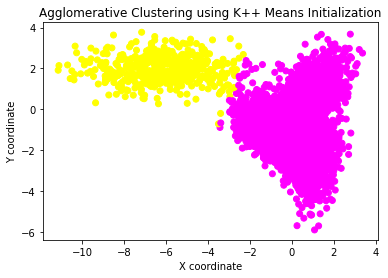

In [323]:
#sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, 
#tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, 
#n_jobs='deprecated', algorithm='auto')

from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=2, init='k-means++')
cluster.fit_predict(df1)
fig, ax = plt.subplots()
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
ax.set_title("Agglomerative Clustering using K++ Means Initialization")
plt.scatter(df1['8.228429240780527065e-01'],df1[' 1.135491058107753304e+00'], c=cluster.labels_, cmap='spring')

In [262]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

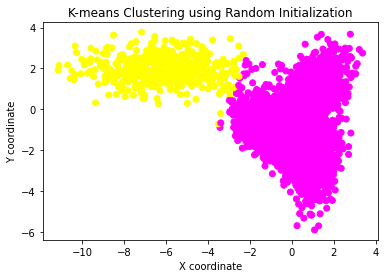

In [349]:
cluster = KMeans(n_clusters=2, init='k-means++')
cluster.fit_predict(df1)
fig, ax = plt.subplots()
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
ax.set_title("K-means Clustering using K++ Means Initialization")
plt.scatter(df1['8.228429240780527065e-01'],df1[' 1.135491058107753304e+00'], c=cluster.labels_, cmap='spring')

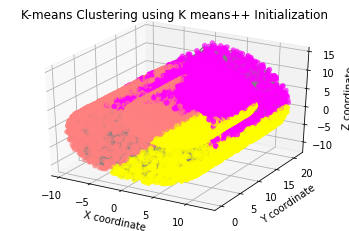

In [355]:
cluster = KMeans(n_clusters=3, init='k-means++')
cluster.fit_predict(df2)
fig, ax = plt.subplots()
ax = plt.axes(projection='3d')
ax.set_xlabel("X coordinate")
ax.plot3D(df2['-6.126607425458740153e+00'], df2[' 1.764511299313616988e+01'],
       df2[' 6.095543727848264481e+00'], 'gray')
ax.set_ylabel("Y coordinate")
ax.set_zlabel("Z coordinate")
ax.set_title("K-means Clustering using K means++ Initialization")
ax.scatter3D(df2['-6.126607425458740153e+00'], df2[' 1.764511299313616988e+01'],
       df2[' 6.095543727848264481e+00'], c=cluster.labels_, cmap='spring')

## Agglomerative Clustering

In [51]:
#sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', 
#memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cluster.fit_predict(df1)

array([0, 0, 0, ..., 0, 0, 0])

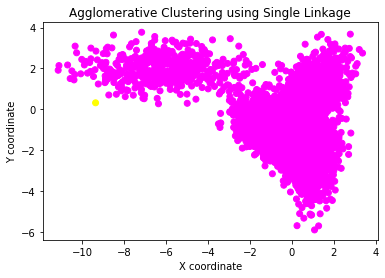

In [52]:
fig, ax = plt.subplots()
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
ax.set_title("Agglomerative Clustering using Single Linkage")
plt.scatter(df1['8.228429240780527065e-01'],df1[' 1.135491058107753304e+00'], c=cluster.labels_, cmap='spring')

In [53]:
#sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', 
#memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster.fit_predict(df1)

array([1, 1, 1, ..., 0, 0, 0])

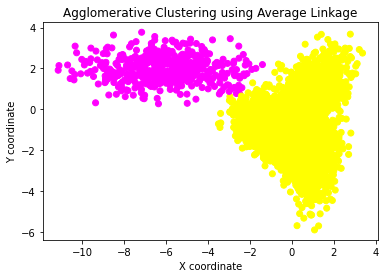

In [54]:
fig, ax = plt.subplots()
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
ax.set_title("Agglomerative Clustering using Average Linkage")
plt.scatter(df1['8.228429240780527065e-01'],df1[' 1.135491058107753304e+00'], c=cluster.labels_, cmap='spring')

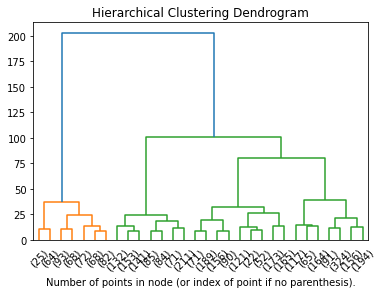

In [30]:
#This code snippet is from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



X = df1

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode = 'lastp')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

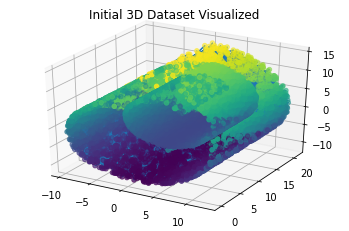

In [77]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(df2['-6.126607425458740153e+00'], df2[' 1.764511299313616988e+01'],
       df2[' 6.095543727848264481e+00'])
ax.scatter3D(df2['-6.126607425458740153e+00'], df2[' 1.764511299313616988e+01'],
       df2[' 6.095543727848264481e+00'],c=df2[' 6.095543727848264481e+00']);
ax.set_title('Initial 3D Dataset Visualized');


In [66]:
#sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', 
#memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
cluster.fit_predict(df2)

array([0, 0, 0, ..., 1, 1, 1])

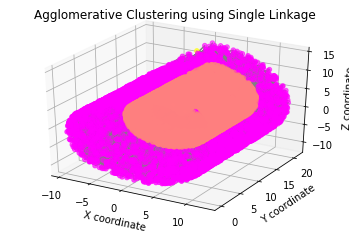

In [72]:
fig, ax = plt.subplots()
ax = plt.axes(projection='3d')
ax.set_xlabel("X coordinate")
ax.plot3D(df2['-6.126607425458740153e+00'], df2[' 1.764511299313616988e+01'],
       df2[' 6.095543727848264481e+00'], 'gray')
ax.set_ylabel("Y coordinate")
ax.set_zlabel("Z coordinate")
ax.set_title("Agglomerative Clustering using Single Linkage")
ax.scatter3D(df2['-6.126607425458740153e+00'], df2[' 1.764511299313616988e+01'],
       df2[' 6.095543727848264481e+00'], c=cluster.labels_, cmap='spring')

In [73]:
#sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', 
#memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(df2)

array([1, 0, 0, ..., 0, 0, 0])

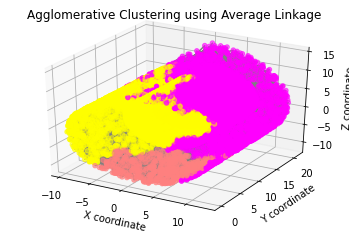

In [75]:
fig, ax = plt.subplots()
ax = plt.axes(projection='3d')
ax.set_xlabel("X coordinate")
ax.plot3D(df2['-6.126607425458740153e+00'], df2[' 1.764511299313616988e+01'],
       df2[' 6.095543727848264481e+00'], 'gray')
ax.set_ylabel("Y coordinate")
ax.set_zlabel("Z coordinate")
ax.set_title("Agglomerative Clustering using Average Linkage")
ax.scatter3D(df2['-6.126607425458740153e+00'], df2[' 1.764511299313616988e+01'],
       df2[' 6.095543727848264481e+00'], c=cluster.labels_, cmap='spring')

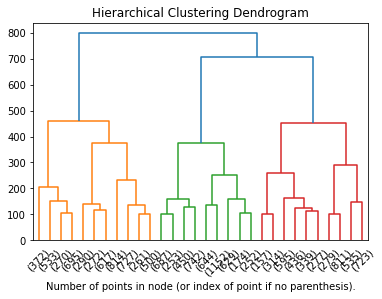

In [79]:
#This code snippet is from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



X = df2

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode = 'lastp')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()